# Black-Scholes Option Pricing Streamlit App

Ce notebook combine la définition de la classe `BlackScholes` et l'application Streamlit pour permettre l'exécution directe du modèle dans un environnement Jupyter.

In [ ]:
# === BlackScholes.py ===
from numpy import exp, sqrt, log
from scipy.stats import norm

class BlackScholes:
    def __init__(self, time_to_maturity: float, strike: float, current_price: float, volatility: float, interest_rate: float):
        self.time_to_maturity = time_to_maturity
        self.strike = strike
        self.current_price = current_price
        self.volatility = volatility
        self.interest_rate = interest_rate

    def run(self):
        time_to_maturity = self.time_to_maturity
        strike = self.strike
        current_price = self.current_price
        volatility = self.volatility
        interest_rate = self.interest_rate

        d1 = (log(current_price / strike) + (interest_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * sqrt(time_to_maturity))
        d2 = d1 - volatility * sqrt(time_to_maturity)

        call_price = current_price * norm.cdf(d1) - (strike * exp(-interest_rate * time_to_maturity) * norm.cdf(d2))
        put_price = (strike * exp(-interest_rate * time_to_maturity) * norm.cdf(-d2)) - current_price * norm.cdf(-d1)

        self.call_price = call_price
        self.put_price = put_price

        # Greeks
        self.call_delta = norm.cdf(d1)
        self.put_delta = 1 - norm.cdf(d1)
        self.call_gamma = norm.pdf(d1) / (strike * volatility * sqrt(time_to_maturity))
        self.put_gamma = self.call_gamma

        return call_price, put_price

In [3]:
import numpy as np
from scipy.stats import norm

class BlackScholes:
    """
    Classe pour le calcul du prix d'options européennes (call et put)
    selon le modèle de Black–Scholes, ainsi que certains « Greeks » (delta, gamma).
    """

    def __init__(
        self,
        time_to_maturity: float,
        strike: float,
        current_price: float,
        volatility: float,
        interest_rate: float
    ):
        """
        Initialise les paramètres du modèle.

        :param time_to_maturity: Temps jusqu'à l'échéance (en années)
        :param strike: Prix d'exercice (strike price)
        :param current_price: Prix actuel de l'actif sous-jacent
        :param volatility: Volatilité annuelle (σ)
        :param interest_rate: Taux d'intérêt sans risque (r), en décimal
        """
        self.time_to_maturity = time_to_maturity
        self.strike = strike
        self.current_price = current_price
        self.volatility = volatility
        self.interest_rate = interest_rate

        # Initialisation des attributs pour les résultats
        self.call_price = None
        self.put_price = None
        self.call_delta = None
        self.put_delta = None
        self.call_gamma = None
        self.put_gamma = None

    def run(self) -> tuple[float, float]:
        """
        Exécute le calcul des prix d'option et des grecs.

        :returns: (prix_call, prix_put)
        """
        T = self.time_to_maturity
        K = self.strike
        S = self.current_price
        σ = self.volatility
        r = self.interest_rate

        # Calcul des termes intermédiaires d1 et d2
        d1 = (
            np.log(S / K)
            + (r + 0.5 * σ**2) * T
        ) / (σ * np.sqrt(T))
        d2 = d1 - σ * np.sqrt(T)

        # Formules de prix : Call et Put
        prix_call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        prix_put  = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

        # Stockage des résultats
        self.call_price = prix_call
        self.put_price  = prix_put

        # Calcul des "Greeks" : delta et gamma
        self.call_delta = norm.cdf(d1)               # ∂C/∂S pour un call
        self.put_delta  = self.call_delta - 1        # ∂P/∂S pour un put
        # γ = ∂²C/∂S² = densité normale de d1 / (Sσ√T)
        # note : ici on exprime gamma en fonction du strike pour illustration,
        #     -> gamma = norm.pdf(d1)/(S*σ*√T)
        self.call_gamma = norm.pdf(d1) / (S * σ * np.sqrt(T))
        self.put_gamma  = self.call_gamma

        return prix_call, prix_put


2025-05-19 13:03:23.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 13:03:23.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

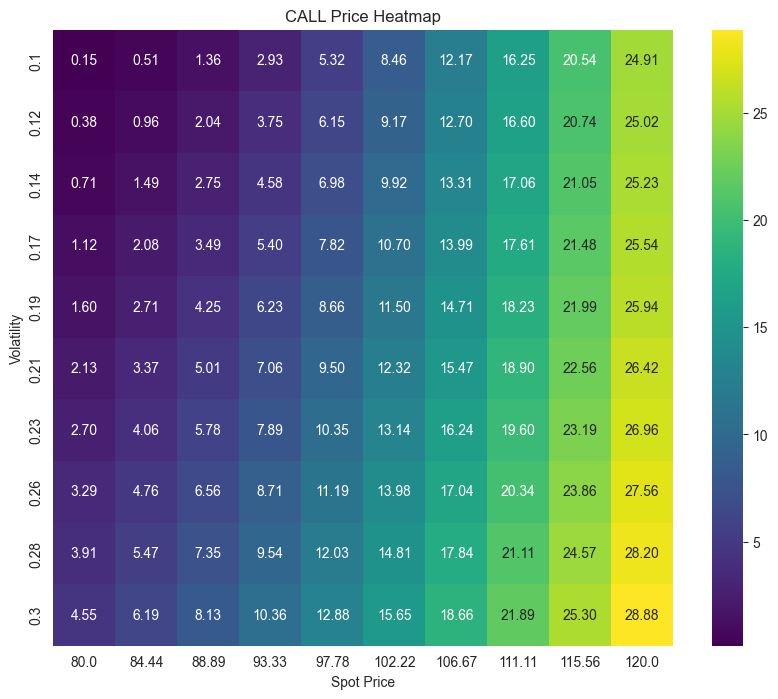

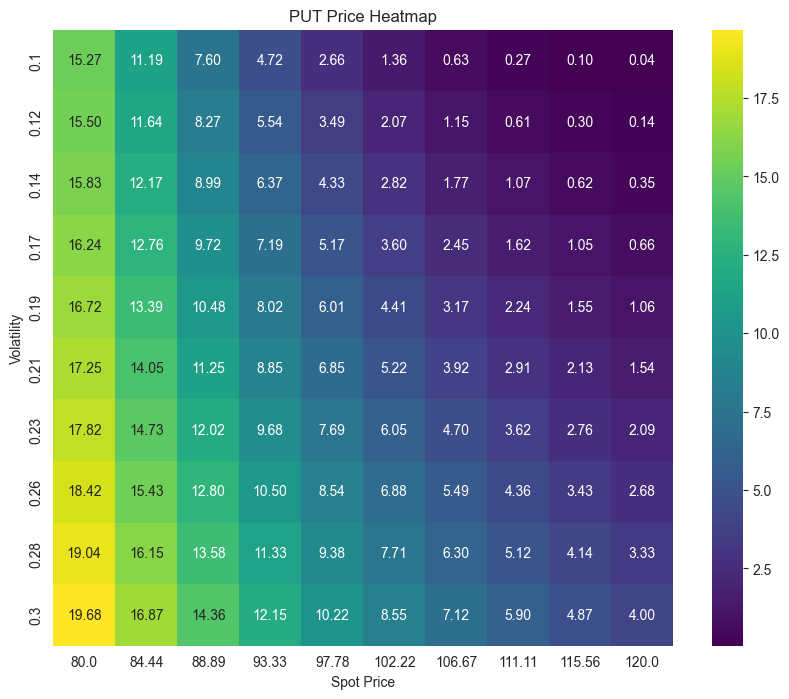

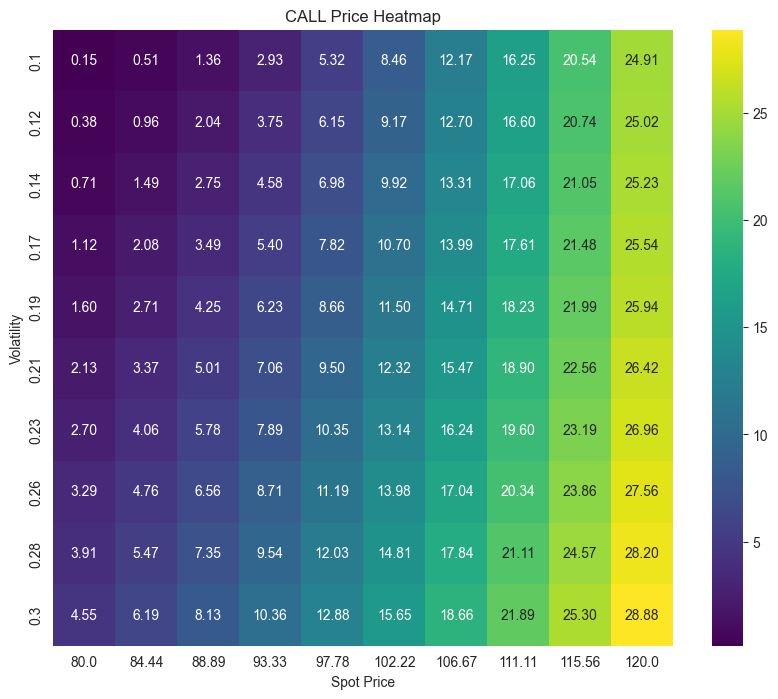

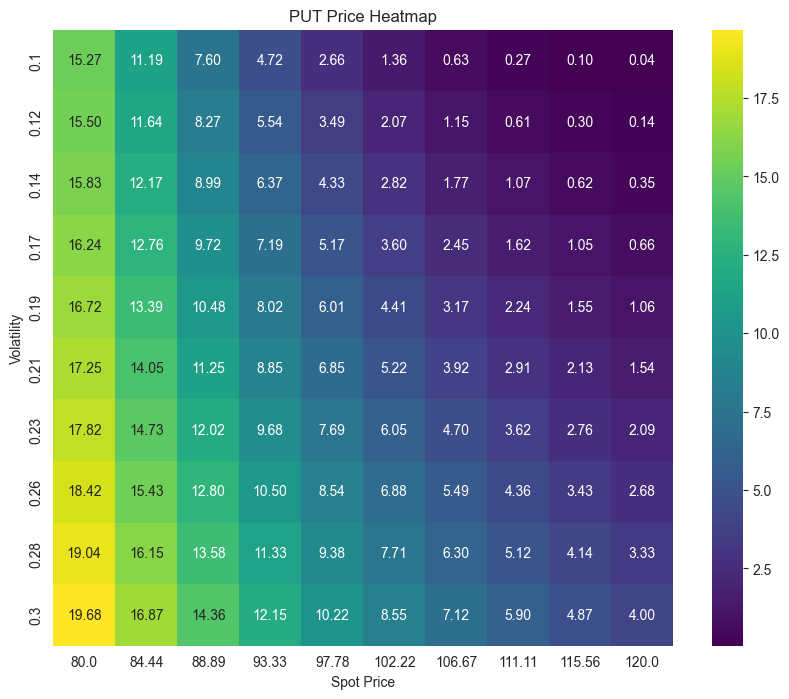

In [5]:
# === streamlit_app.py ===
import streamlit as st
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
from numpy import log, sqrt, exp
import matplotlib.pyplot as plt
import seaborn as sns
from BlackScholes import BlackScholes  # Make sure this file is in the same directory


class BlackScholes:
    def __init__(self, time_to_maturity: float, strike: float, current_price: float, volatility: float, interest_rate: float):
        self.time_to_maturity = time_to_maturity
        self.strike = strike
        self.current_price = current_price
        self.volatility = volatility
        self.interest_rate = interest_rate

    def run(self):
        time_to_maturity = self.time_to_maturity
        strike = self.strike
        current_price = self.current_price
        volatility = self.volatility
        interest_rate = self.interest_rate

        d1 = (log(current_price / strike) + (interest_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * sqrt(time_to_maturity))
        d2 = d1 - volatility * sqrt(time_to_maturity)

        call_price = current_price * norm.cdf(d1) - (strike * exp(-interest_rate * time_to_maturity) * norm.cdf(d2))
        put_price = (strike * exp(-interest_rate * time_to_maturity) * norm.cdf(-d2)) - current_price * norm.cdf(-d1)

        self.call_price = call_price
        self.put_price = put_price

        # Greeks
        self.call_delta = norm.cdf(d1)
        self.put_delta = 1 - norm.cdf(d1)
        self.call_gamma = norm.pdf(d1) / (strike * volatility * sqrt(time_to_maturity))
        self.put_gamma = self.call_gamma

        return call_price, put_price


# Page configuration
st.set_page_config(
    page_title='Black-Scholes Option Pricing Model',
    page_icon='📊',
    layout='wide',
    initial_sidebar_state='expanded'
)

# Custom CSS
st.markdown("""
<style>
.metric-container {
    display: flex;
    justify-content: center;
    align-items: center;
    padding: 8px;
    margin: 0 auto;
}
.metric-call { background-color: #90ee90; color: black; margin-right: 10px; border-radius: 10px; }
.metric-put  { background-color: #ffcccb; color: black; border-radius: 10px; }
.metric-value  { font-size: 1.5rem; font-weight: bold; }
.metric-label  { font-size: 1rem; margin-bottom: 4px; }
</style>
""", unsafe_allow_html=True)

# Sidebar user inputs
with st.sidebar:
    st.title('📊 Black-Scholes Model')
    linkedin_url = 'https://www.linkedin.com/in/mprudhvi/'
    st.markdown(f'<a href="{linkedin_url}" target="_blank">Prudhvi Reddy, Muppala</a>', unsafe_allow_html=True)
    current_price = st.number_input('Current Asset Price', value=100.0)
    strike = st.number_input('Strike Price', value=100.0)
    time_to_maturity = st.number_input('Time to Maturity (Years)', value=1.0)
    volatility = st.number_input('Volatility (σ)', value=0.2)
    interest_rate = st.number_input('Risk-Free Interest Rate', value=0.05)
    st.markdown('---')
    calculate_btn = st.button('Heatmap Parameters')
    spot_min = st.number_input('Min Spot Price', min_value=0.01, value=current_price*0.8, step=0.01)
    spot_max = st.number_input('Max Spot Price', min_value=0.01, value=current_price*1.2, step=0.01)
    vol_min = st.slider('Min Volatility for Heatmap', min_value=0.01, max_value=1.0, value=volatility*0.5, step=0.01)
    vol_max = st.slider('Max Volatility for Heatmap', min_value=0.01, max_value=1.0, value=volatility*1.5, step=0.01)
    spot_range = np.linspace(spot_min, spot_max, 10)
    vol_range = np.linspace(vol_min, vol_max, 10)

def plot_heatmap(bs_model, spot_range, vol_range, strike):
    call_prices = np.zeros((len(vol_range), len(spot_range)))
    put_prices = np.zeros((len(vol_range), len(spot_range)))
    for i, vol in enumerate(vol_range):
        for j, spot in enumerate(spot_range):
            bs_temp = BlackScholes(time_to_maturity=bs_model.time_to_maturity, strike=strike,
                                   current_price=spot, volatility=vol, interest_rate=bs_model.interest_rate)
            bs_temp.run()
            call_prices[i, j] = bs_temp.call_price
            put_prices[i, j] = bs_temp.put_price
    fig_call, ax_call = plt.subplots(figsize=(10, 8))
    sns.heatmap(call_prices, xticklabels=np.round(spot_range, 2), yticklabels=np.round(vol_range, 2),
                annot=True, fmt='.2f', cmap='viridis', ax=ax_call)
    ax_call.set_title('CALL Price Heatmap')
    ax_call.set_xlabel('Spot Price')
    ax_call.set_ylabel('Volatility')
    fig_put, ax_put = plt.subplots(figsize=(10, 8))
    sns.heatmap(put_prices, xticklabels=np.round(spot_range, 2), yticklabels=np.round(vol_range, 2),
                annot=True, fmt='.2f', cmap='viridis', ax=ax_put)
    ax_put.set_title('PUT Price Heatmap')
    ax_put.set_xlabel('Spot Price')
    ax_put.set_ylabel('Volatility')
    return fig_call, fig_put

# Main display
st.title('Black-Scholes Pricing Model')
input_df = pd.DataFrame({
    'Current Asset Price': [current_price],
    'Strike Price': [strike],
    'Time to Maturity (Years)': [time_to_maturity],
    'Volatility (σ)': [volatility],
    'Risk-Free Interest Rate': [interest_rate]
})
st.table(input_df)
bs_model = BlackScholes(time_to_maturity, strike, current_price, volatility, interest_rate)
call_price, put_price = bs_model.run()

col1, col2 = st.columns([1, 1], gap='small')
with col1:
    st.markdown(f"""<div class='metric-container metric-call'>
<div class='metric-label'>CALL Value</div>
<div class='metric-value'>${{call_price:.2f}}</div>
</div>""", unsafe_allow_html=True)
with col2:
    st.markdown(f"""<div class='metric-container metric-put'>
<div class='metric-label'>PUT Value</div>
<div class='metric-value'>${{put_price:.2f}}</div>
</div>""", unsafe_allow_html=True)

st.subheader('Options Price - Interactive Heatmap')
col1, col2 = st.columns([1, 1], gap='small')
with col1:
    fig_call, _ = plot_heatmap(bs_model, spot_range, vol_range, strike)
    st.pyplot(fig_call)
with col2:
    _, fig_put = plot_heatmap(bs_model, spot_range, vol_range, strike)
    st.pyplot(fig_put)
